In [1]:
'''Import the libraries'''
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import HTML
import hashlib
import joblib
import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score

'''This notebook will use five thirtyeight style'''
plt.style.use('ggplot')

In [2]:
'''Load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)

In [3]:
'''Update the datetime columns from string to datetime'''
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])

In [4]:
'''For EDA, we will use the year 2018 data'''
loan_data_2018 = loan_data[loan_data['issue_d'].dt.year == 2018]
# loan_risk_data_2018 = loan_data_2018[loan_data_2018['loan_status'] != 'Fully Paid']
loan_data_2018.shape

(57924, 38)

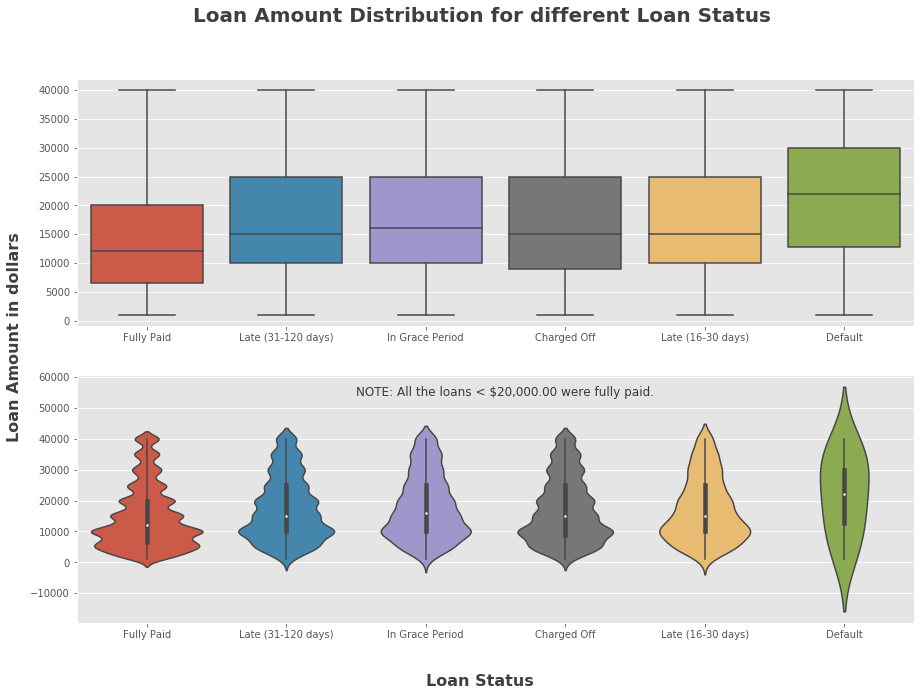

In [68]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="loan_amnt", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="loan_amnt", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Loan Amount Distribution for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()

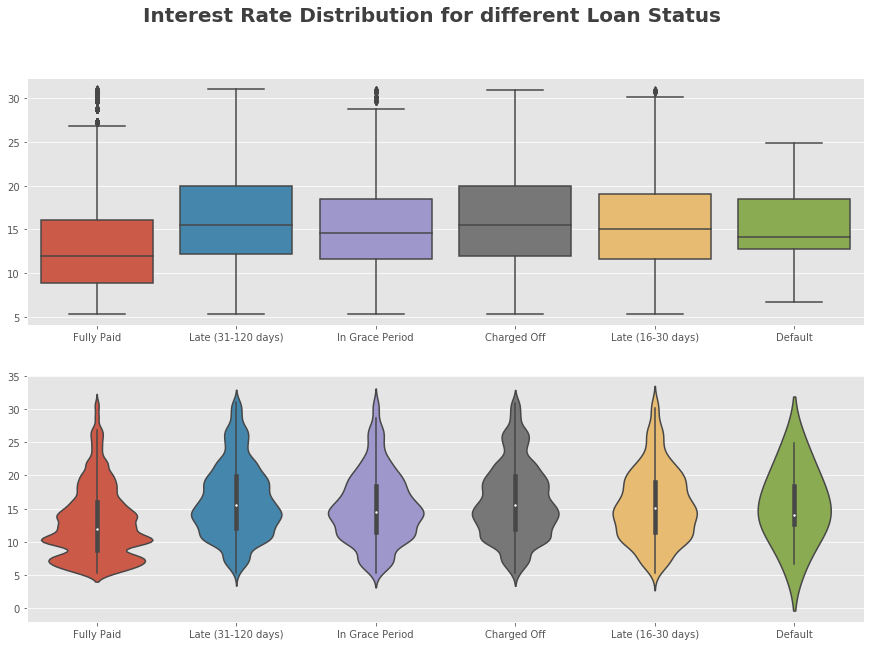

In [70]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="int_rate", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="int_rate", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Interest Rate Distribution for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()

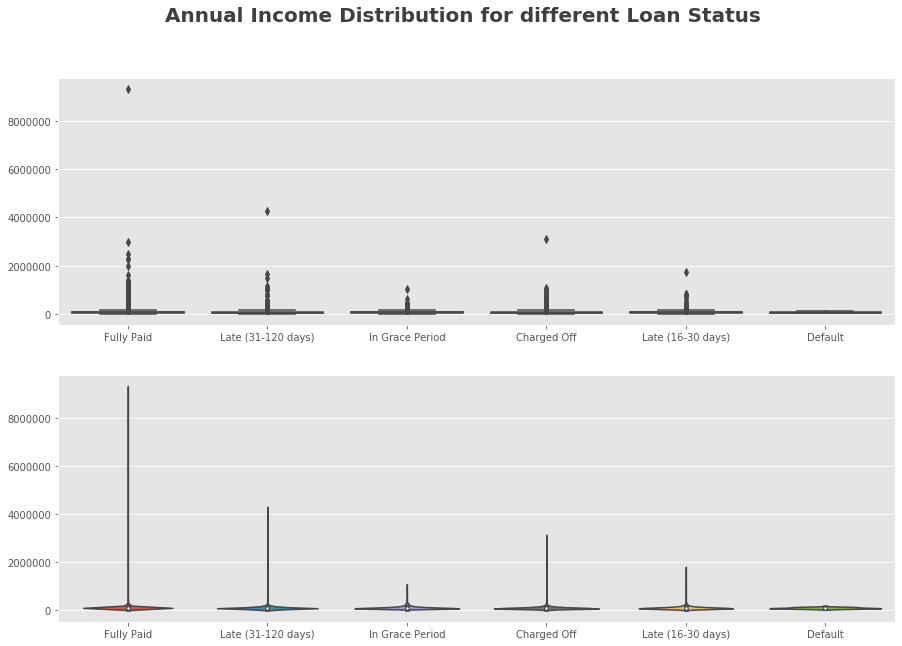

In [71]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="annual_inc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="annual_inc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Annual Income Distribution for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()

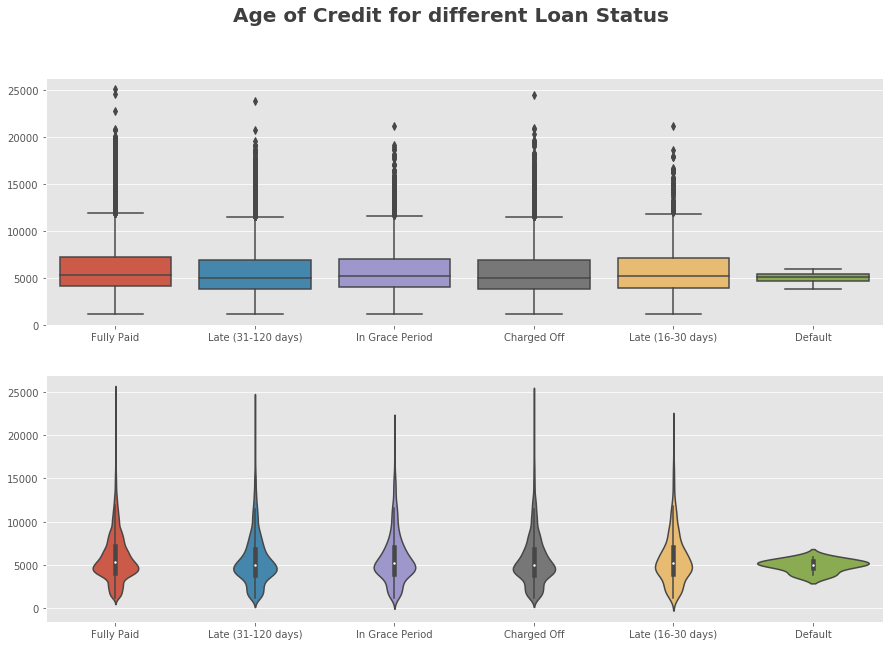

In [73]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="age_of_credit_in_days", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="age_of_credit_in_days", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Age of Credit for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()

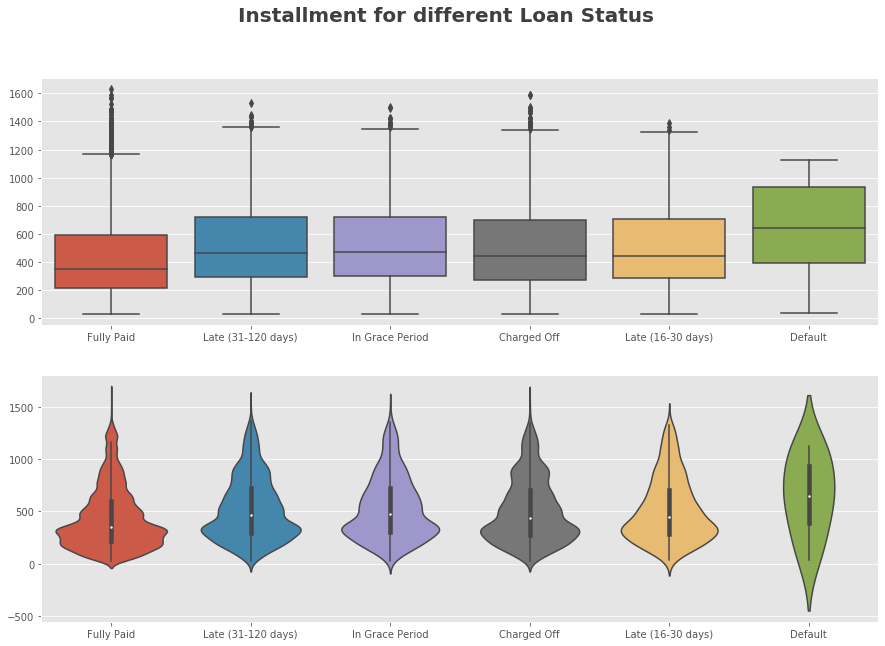

In [74]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="installment", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="installment", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Installment for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()

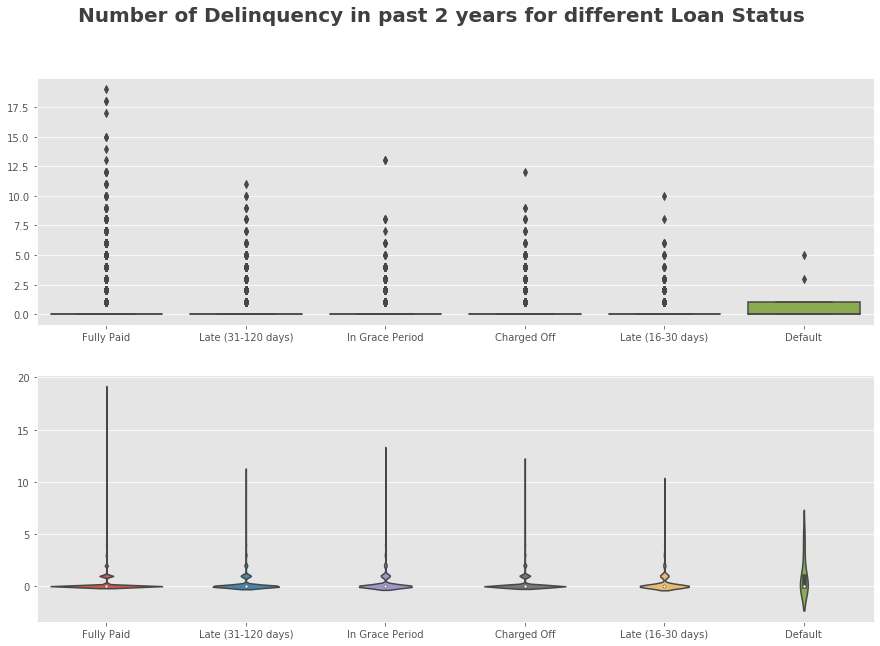

In [75]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="delinq_2yrs", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="delinq_2yrs", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Number of Delinquency in past 2 years for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()

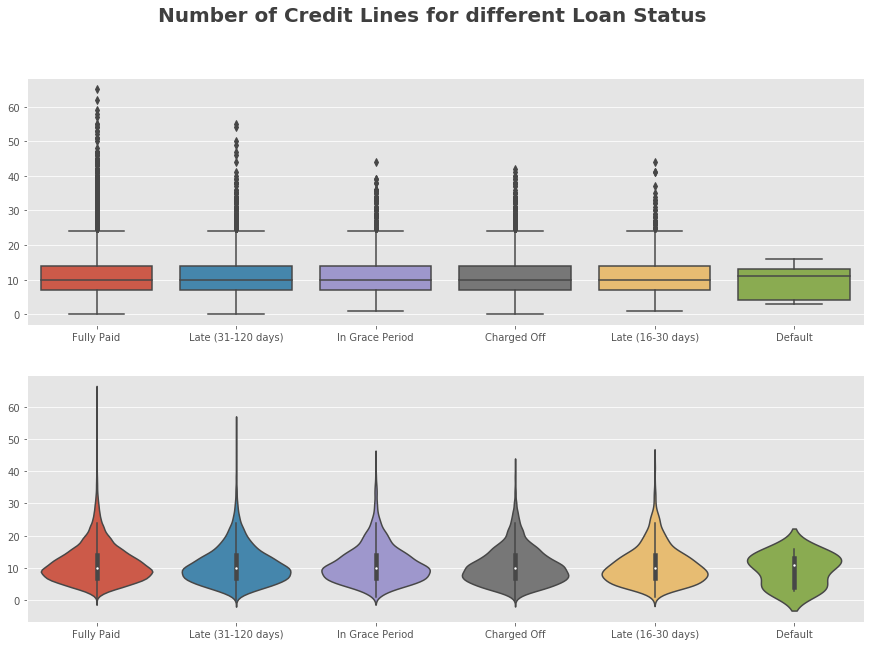

In [77]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="open_acc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="open_acc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Number of Credit Lines for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()

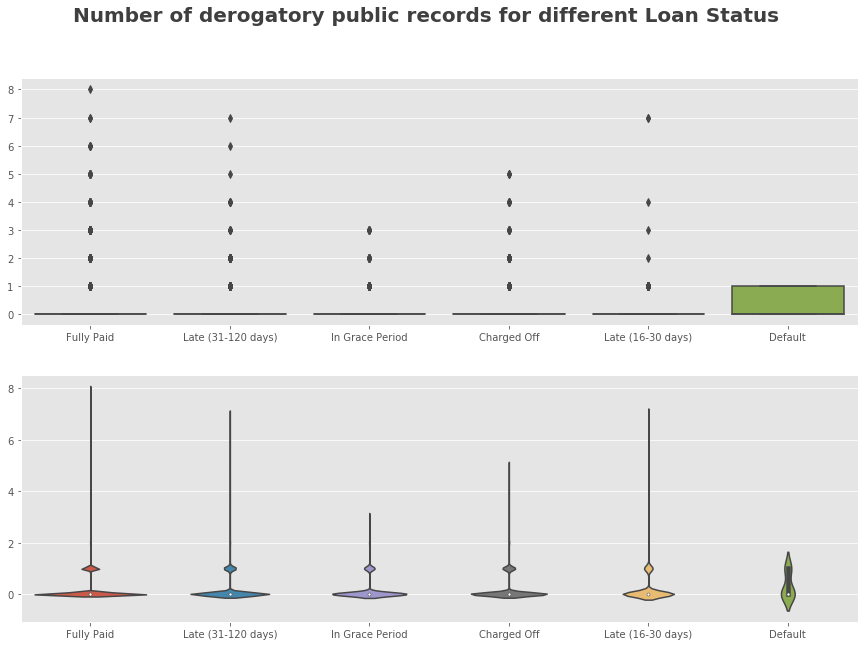

In [79]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="pub_rec", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="pub_rec", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Number of derogatory public records for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()

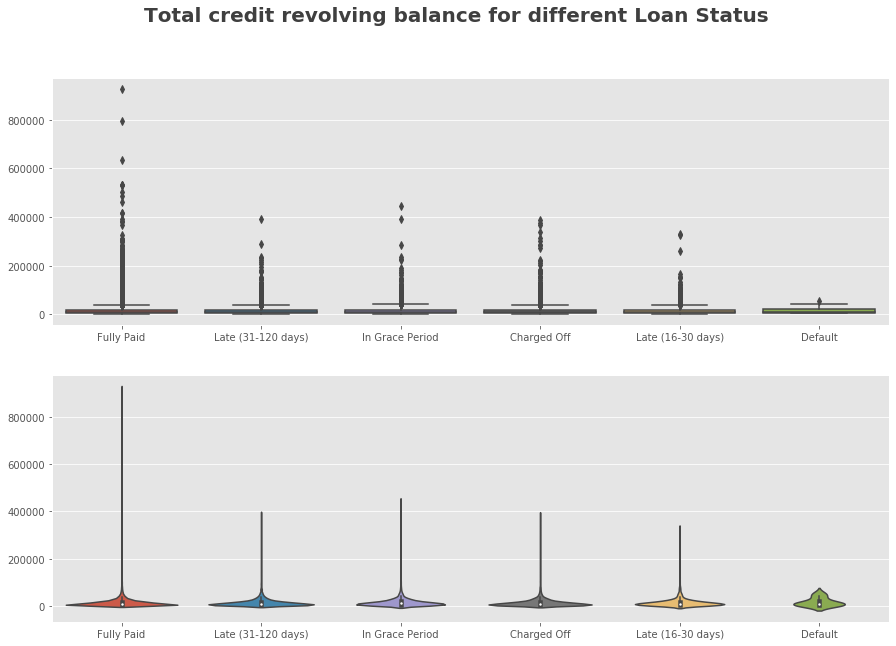

In [80]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="revol_bal", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="revol_bal", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Total credit revolving balance for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()

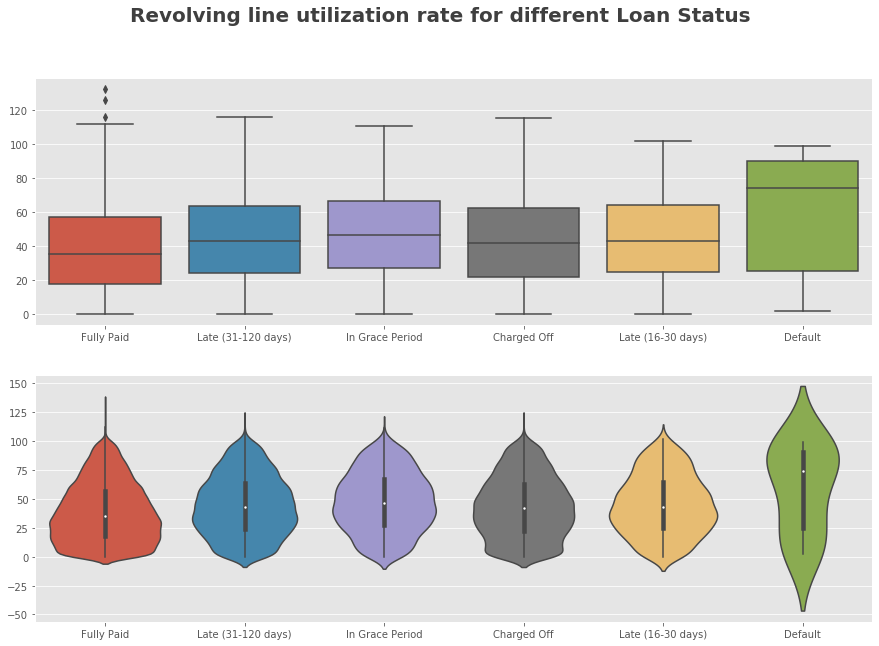

In [81]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="revol_util", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="revol_util", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Revolving line utilization rate for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)


plt.show()